In [2]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
print(torch.cuda.is_available())

1
0
Tesla V100S-PCIE-32GB
True


In [3]:
model = AutoModelForQuestionAnswering.from_pretrained('../cuad-models/roberta-base/')
tokenizer = AutoTokenizer.from_pretrained('../cuad-models/roberta-base/', use_fast=False)

In [4]:
with open('../cuad-data/CUADv1.json') as json_file:
    data = json.load(json_file)

In [38]:
#!pip install flatten_json


print( len(data['data']))

from flatten_json import flatten

for key in flatten(data).keys():
    print(key)


  Created wheel for flatten-json: filename=flatten_json-0.1.13-py3-none-any.whl size=7967 sha256=5a0cf51b77f691cdcf9eb269b704b2a7a3c60d7061ceb9a0a364dd9ee6dc04f0
  Stored in directory: /home/kv806/.cache/pip/wheels/2b/38/e6/3677d68edba62ae6daa6e28cafd60cd58189fda42be1c0c79c
Successfully built flatten-json
510
version
data_0_title
data_0_paragraphs_0_qas_0_answers_0_text
data_0_paragraphs_0_qas_0_answers_0_answer_start
data_0_paragraphs_0_qas_0_id
data_0_paragraphs_0_qas_0_question
data_0_paragraphs_0_qas_0_is_impossible
data_0_paragraphs_0_qas_1_answers_0_text
data_0_paragraphs_0_qas_1_answers_0_answer_start
data_0_paragraphs_0_qas_1_answers_1_text
data_0_paragraphs_0_qas_1_answers_1_answer_start
data_0_paragraphs_0_qas_1_answers_2_text
data_0_paragraphs_0_qas_1_answers_2_answer_start
data_0_paragraphs_0_qas_1_answers_3_text
data_0_paragraphs_0_qas_1_answers_3_answer_start
data_0_paragraphs_0_qas_1_answers_4_text
data_0_paragraphs_0_qas_1_answers_4_answer_start
data_0_paragraphs_0_qas_

data_7_paragraphs_0_qas_38_question
data_7_paragraphs_0_qas_38_is_impossible
data_7_paragraphs_0_qas_39_answers
data_7_paragraphs_0_qas_39_id
data_7_paragraphs_0_qas_39_question
data_7_paragraphs_0_qas_39_is_impossible
data_7_paragraphs_0_qas_40_answers
data_7_paragraphs_0_qas_40_id
data_7_paragraphs_0_qas_40_question
data_7_paragraphs_0_qas_40_is_impossible
data_7_paragraphs_0_context
data_8_title
data_8_paragraphs_0_qas_0_answers_0_text
data_8_paragraphs_0_qas_0_answers_0_answer_start
data_8_paragraphs_0_qas_0_id
data_8_paragraphs_0_qas_0_question
data_8_paragraphs_0_qas_0_is_impossible
data_8_paragraphs_0_qas_1_answers_0_text
data_8_paragraphs_0_qas_1_answers_0_answer_start
data_8_paragraphs_0_qas_1_answers_1_text
data_8_paragraphs_0_qas_1_answers_1_answer_start
data_8_paragraphs_0_qas_1_answers_2_text
data_8_paragraphs_0_qas_1_answers_2_answer_start
data_8_paragraphs_0_qas_1_answers_3_text
data_8_paragraphs_0_qas_1_answers_3_answer_start
data_8_paragraphs_0_qas_1_answers_4_text
dat

data_21_paragraphs_0_qas_7_id
data_21_paragraphs_0_qas_7_question
data_21_paragraphs_0_qas_7_is_impossible
data_21_paragraphs_0_qas_8_answers
data_21_paragraphs_0_qas_8_id
data_21_paragraphs_0_qas_8_question
data_21_paragraphs_0_qas_8_is_impossible
data_21_paragraphs_0_qas_9_answers
data_21_paragraphs_0_qas_9_id
data_21_paragraphs_0_qas_9_question
data_21_paragraphs_0_qas_9_is_impossible
data_21_paragraphs_0_qas_10_answers_0_text
data_21_paragraphs_0_qas_10_answers_0_answer_start
data_21_paragraphs_0_qas_10_answers_1_text
data_21_paragraphs_0_qas_10_answers_1_answer_start
data_21_paragraphs_0_qas_10_answers_2_text
data_21_paragraphs_0_qas_10_answers_2_answer_start
data_21_paragraphs_0_qas_10_answers_3_text
data_21_paragraphs_0_qas_10_answers_3_answer_start
data_21_paragraphs_0_qas_10_answers_4_text
data_21_paragraphs_0_qas_10_answers_4_answer_start
data_21_paragraphs_0_qas_10_answers_5_text
data_21_paragraphs_0_qas_10_answers_5_answer_start
data_21_paragraphs_0_qas_10_id
data_21_paragr

data_22_paragraphs_0_qas_3_answers_0_answer_start
data_22_paragraphs_0_qas_3_id
data_22_paragraphs_0_qas_3_question
data_22_paragraphs_0_qas_3_is_impossible
data_22_paragraphs_0_qas_4_answers_0_text
data_22_paragraphs_0_qas_4_answers_0_answer_start
data_22_paragraphs_0_qas_4_id
data_22_paragraphs_0_qas_4_question
data_22_paragraphs_0_qas_4_is_impossible
data_22_paragraphs_0_qas_5_answers
data_22_paragraphs_0_qas_5_id
data_22_paragraphs_0_qas_5_question
data_22_paragraphs_0_qas_5_is_impossible
data_22_paragraphs_0_qas_6_answers
data_22_paragraphs_0_qas_6_id
data_22_paragraphs_0_qas_6_question
data_22_paragraphs_0_qas_6_is_impossible
data_22_paragraphs_0_qas_7_answers_0_text
data_22_paragraphs_0_qas_7_answers_0_answer_start
data_22_paragraphs_0_qas_7_id
data_22_paragraphs_0_qas_7_question
data_22_paragraphs_0_qas_7_is_impossible
data_22_paragraphs_0_qas_8_answers
data_22_paragraphs_0_qas_8_id
data_22_paragraphs_0_qas_8_question
data_22_paragraphs_0_qas_8_is_impossible
data_22_paragraphs_

data_38_paragraphs_0_qas_37_answers_0_answer_start
data_38_paragraphs_0_qas_37_id
data_38_paragraphs_0_qas_37_question
data_38_paragraphs_0_qas_37_is_impossible
data_38_paragraphs_0_qas_38_answers_0_text
data_38_paragraphs_0_qas_38_answers_0_answer_start
data_38_paragraphs_0_qas_38_answers_1_text
data_38_paragraphs_0_qas_38_answers_1_answer_start
data_38_paragraphs_0_qas_38_id
data_38_paragraphs_0_qas_38_question
data_38_paragraphs_0_qas_38_is_impossible
data_38_paragraphs_0_qas_39_answers
data_38_paragraphs_0_qas_39_id
data_38_paragraphs_0_qas_39_question
data_38_paragraphs_0_qas_39_is_impossible
data_38_paragraphs_0_qas_40_answers
data_38_paragraphs_0_qas_40_id
data_38_paragraphs_0_qas_40_question
data_38_paragraphs_0_qas_40_is_impossible
data_38_paragraphs_0_context
data_39_title
data_39_paragraphs_0_qas_0_answers_0_text
data_39_paragraphs_0_qas_0_answers_0_answer_start
data_39_paragraphs_0_qas_0_id
data_39_paragraphs_0_qas_0_question
data_39_paragraphs_0_qas_0_is_impossible
data_39

data_58_paragraphs_0_qas_24_question
data_58_paragraphs_0_qas_24_is_impossible
data_58_paragraphs_0_qas_25_answers
data_58_paragraphs_0_qas_25_id
data_58_paragraphs_0_qas_25_question
data_58_paragraphs_0_qas_25_is_impossible
data_58_paragraphs_0_qas_26_answers
data_58_paragraphs_0_qas_26_id
data_58_paragraphs_0_qas_26_question
data_58_paragraphs_0_qas_26_is_impossible
data_58_paragraphs_0_qas_27_answers
data_58_paragraphs_0_qas_27_id
data_58_paragraphs_0_qas_27_question
data_58_paragraphs_0_qas_27_is_impossible
data_58_paragraphs_0_qas_28_answers
data_58_paragraphs_0_qas_28_id
data_58_paragraphs_0_qas_28_question
data_58_paragraphs_0_qas_28_is_impossible
data_58_paragraphs_0_qas_29_answers
data_58_paragraphs_0_qas_29_id
data_58_paragraphs_0_qas_29_question
data_58_paragraphs_0_qas_29_is_impossible
data_58_paragraphs_0_qas_30_answers
data_58_paragraphs_0_qas_30_id
data_58_paragraphs_0_qas_30_question
data_58_paragraphs_0_qas_30_is_impossible
data_58_paragraphs_0_qas_31_answers
data_58_p

data_71_paragraphs_0_qas_20_answers_6_text
data_71_paragraphs_0_qas_20_answers_6_answer_start
data_71_paragraphs_0_qas_20_id
data_71_paragraphs_0_qas_20_question
data_71_paragraphs_0_qas_20_is_impossible
data_71_paragraphs_0_qas_21_answers_0_text
data_71_paragraphs_0_qas_21_answers_0_answer_start
data_71_paragraphs_0_qas_21_answers_1_text
data_71_paragraphs_0_qas_21_answers_1_answer_start
data_71_paragraphs_0_qas_21_answers_2_text
data_71_paragraphs_0_qas_21_answers_2_answer_start
data_71_paragraphs_0_qas_21_answers_3_text
data_71_paragraphs_0_qas_21_answers_3_answer_start
data_71_paragraphs_0_qas_21_answers_4_text
data_71_paragraphs_0_qas_21_answers_4_answer_start
data_71_paragraphs_0_qas_21_id
data_71_paragraphs_0_qas_21_question
data_71_paragraphs_0_qas_21_is_impossible
data_71_paragraphs_0_qas_22_answers_0_text
data_71_paragraphs_0_qas_22_answers_0_answer_start
data_71_paragraphs_0_qas_22_id
data_71_paragraphs_0_qas_22_question
data_71_paragraphs_0_qas_22_is_impossible
data_71_para

data_78_paragraphs_0_qas_13_answers_1_text
data_78_paragraphs_0_qas_13_answers_1_answer_start
data_78_paragraphs_0_qas_13_id
data_78_paragraphs_0_qas_13_question
data_78_paragraphs_0_qas_13_is_impossible
data_78_paragraphs_0_qas_14_answers
data_78_paragraphs_0_qas_14_id
data_78_paragraphs_0_qas_14_question
data_78_paragraphs_0_qas_14_is_impossible
data_78_paragraphs_0_qas_15_answers_0_text
data_78_paragraphs_0_qas_15_answers_0_answer_start
data_78_paragraphs_0_qas_15_answers_1_text
data_78_paragraphs_0_qas_15_answers_1_answer_start
data_78_paragraphs_0_qas_15_answers_2_text
data_78_paragraphs_0_qas_15_answers_2_answer_start
data_78_paragraphs_0_qas_15_id
data_78_paragraphs_0_qas_15_question
data_78_paragraphs_0_qas_15_is_impossible
data_78_paragraphs_0_qas_16_answers_0_text
data_78_paragraphs_0_qas_16_answers_0_answer_start
data_78_paragraphs_0_qas_16_answers_1_text
data_78_paragraphs_0_qas_16_answers_1_answer_start
data_78_paragraphs_0_qas_16_id
data_78_paragraphs_0_qas_16_question
da

data_97_paragraphs_0_qas_28_id
data_97_paragraphs_0_qas_28_question
data_97_paragraphs_0_qas_28_is_impossible
data_97_paragraphs_0_qas_29_answers
data_97_paragraphs_0_qas_29_id
data_97_paragraphs_0_qas_29_question
data_97_paragraphs_0_qas_29_is_impossible
data_97_paragraphs_0_qas_30_answers
data_97_paragraphs_0_qas_30_id
data_97_paragraphs_0_qas_30_question
data_97_paragraphs_0_qas_30_is_impossible
data_97_paragraphs_0_qas_31_answers
data_97_paragraphs_0_qas_31_id
data_97_paragraphs_0_qas_31_question
data_97_paragraphs_0_qas_31_is_impossible
data_97_paragraphs_0_qas_32_answers
data_97_paragraphs_0_qas_32_id
data_97_paragraphs_0_qas_32_question
data_97_paragraphs_0_qas_32_is_impossible
data_97_paragraphs_0_qas_33_answers
data_97_paragraphs_0_qas_33_id
data_97_paragraphs_0_qas_33_question
data_97_paragraphs_0_qas_33_is_impossible
data_97_paragraphs_0_qas_34_answers
data_97_paragraphs_0_qas_34_id
data_97_paragraphs_0_qas_34_question
data_97_paragraphs_0_qas_34_is_impossible
data_97_paragr

data_116_paragraphs_0_qas_35_answers_0_answer_start
data_116_paragraphs_0_qas_35_id
data_116_paragraphs_0_qas_35_question
data_116_paragraphs_0_qas_35_is_impossible
data_116_paragraphs_0_qas_36_answers
data_116_paragraphs_0_qas_36_id
data_116_paragraphs_0_qas_36_question
data_116_paragraphs_0_qas_36_is_impossible
data_116_paragraphs_0_qas_37_answers_0_text
data_116_paragraphs_0_qas_37_answers_0_answer_start
data_116_paragraphs_0_qas_37_id
data_116_paragraphs_0_qas_37_question
data_116_paragraphs_0_qas_37_is_impossible
data_116_paragraphs_0_qas_38_answers_0_text
data_116_paragraphs_0_qas_38_answers_0_answer_start
data_116_paragraphs_0_qas_38_id
data_116_paragraphs_0_qas_38_question
data_116_paragraphs_0_qas_38_is_impossible
data_116_paragraphs_0_qas_39_answers
data_116_paragraphs_0_qas_39_id
data_116_paragraphs_0_qas_39_question
data_116_paragraphs_0_qas_39_is_impossible
data_116_paragraphs_0_qas_40_answers
data_116_paragraphs_0_qas_40_id
data_116_paragraphs_0_qas_40_question
data_116_p

data_140_paragraphs_0_qas_2_answers
data_140_paragraphs_0_qas_2_id
data_140_paragraphs_0_qas_2_question
data_140_paragraphs_0_qas_2_is_impossible
data_140_paragraphs_0_qas_3_answers_0_text
data_140_paragraphs_0_qas_3_answers_0_answer_start
data_140_paragraphs_0_qas_3_id
data_140_paragraphs_0_qas_3_question
data_140_paragraphs_0_qas_3_is_impossible
data_140_paragraphs_0_qas_4_answers_0_text
data_140_paragraphs_0_qas_4_answers_0_answer_start
data_140_paragraphs_0_qas_4_id
data_140_paragraphs_0_qas_4_question
data_140_paragraphs_0_qas_4_is_impossible
data_140_paragraphs_0_qas_5_answers_0_text
data_140_paragraphs_0_qas_5_answers_0_answer_start
data_140_paragraphs_0_qas_5_id
data_140_paragraphs_0_qas_5_question
data_140_paragraphs_0_qas_5_is_impossible
data_140_paragraphs_0_qas_6_answers_0_text
data_140_paragraphs_0_qas_6_answers_0_answer_start
data_140_paragraphs_0_qas_6_id
data_140_paragraphs_0_qas_6_question
data_140_paragraphs_0_qas_6_is_impossible
data_140_paragraphs_0_qas_7_answers_0_

data_161_paragraphs_0_qas_29_answers
data_161_paragraphs_0_qas_29_id
data_161_paragraphs_0_qas_29_question
data_161_paragraphs_0_qas_29_is_impossible
data_161_paragraphs_0_qas_30_answers
data_161_paragraphs_0_qas_30_id
data_161_paragraphs_0_qas_30_question
data_161_paragraphs_0_qas_30_is_impossible
data_161_paragraphs_0_qas_31_answers
data_161_paragraphs_0_qas_31_id
data_161_paragraphs_0_qas_31_question
data_161_paragraphs_0_qas_31_is_impossible
data_161_paragraphs_0_qas_32_answers_0_text
data_161_paragraphs_0_qas_32_answers_0_answer_start
data_161_paragraphs_0_qas_32_answers_1_text
data_161_paragraphs_0_qas_32_answers_1_answer_start
data_161_paragraphs_0_qas_32_id
data_161_paragraphs_0_qas_32_question
data_161_paragraphs_0_qas_32_is_impossible
data_161_paragraphs_0_qas_33_answers_0_text
data_161_paragraphs_0_qas_33_answers_0_answer_start
data_161_paragraphs_0_qas_33_answers_1_text
data_161_paragraphs_0_qas_33_answers_1_answer_start
data_161_paragraphs_0_qas_33_id
data_161_paragraphs_0

data_180_paragraphs_0_qas_11_question
data_180_paragraphs_0_qas_11_is_impossible
data_180_paragraphs_0_qas_12_answers_0_text
data_180_paragraphs_0_qas_12_answers_0_answer_start
data_180_paragraphs_0_qas_12_id
data_180_paragraphs_0_qas_12_question
data_180_paragraphs_0_qas_12_is_impossible
data_180_paragraphs_0_qas_13_answers
data_180_paragraphs_0_qas_13_id
data_180_paragraphs_0_qas_13_question
data_180_paragraphs_0_qas_13_is_impossible
data_180_paragraphs_0_qas_14_answers
data_180_paragraphs_0_qas_14_id
data_180_paragraphs_0_qas_14_question
data_180_paragraphs_0_qas_14_is_impossible
data_180_paragraphs_0_qas_15_answers
data_180_paragraphs_0_qas_15_id
data_180_paragraphs_0_qas_15_question
data_180_paragraphs_0_qas_15_is_impossible
data_180_paragraphs_0_qas_16_answers_0_text
data_180_paragraphs_0_qas_16_answers_0_answer_start
data_180_paragraphs_0_qas_16_answers_1_text
data_180_paragraphs_0_qas_16_answers_1_answer_start
data_180_paragraphs_0_qas_16_answers_2_text
data_180_paragraphs_0_qa

data_201_paragraphs_0_qas_1_answers_0_text
data_201_paragraphs_0_qas_1_answers_0_answer_start
data_201_paragraphs_0_qas_1_answers_1_text
data_201_paragraphs_0_qas_1_answers_1_answer_start
data_201_paragraphs_0_qas_1_answers_2_text
data_201_paragraphs_0_qas_1_answers_2_answer_start
data_201_paragraphs_0_qas_1_answers_3_text
data_201_paragraphs_0_qas_1_answers_3_answer_start
data_201_paragraphs_0_qas_1_answers_4_text
data_201_paragraphs_0_qas_1_answers_4_answer_start
data_201_paragraphs_0_qas_1_id
data_201_paragraphs_0_qas_1_question
data_201_paragraphs_0_qas_1_is_impossible
data_201_paragraphs_0_qas_2_answers_0_text
data_201_paragraphs_0_qas_2_answers_0_answer_start
data_201_paragraphs_0_qas_2_id
data_201_paragraphs_0_qas_2_question
data_201_paragraphs_0_qas_2_is_impossible
data_201_paragraphs_0_qas_3_answers_0_text
data_201_paragraphs_0_qas_3_answers_0_answer_start
data_201_paragraphs_0_qas_3_id
data_201_paragraphs_0_qas_3_question
data_201_paragraphs_0_qas_3_is_impossible
data_201_par

data_225_paragraphs_0_qas_9_answers_1_answer_start
data_225_paragraphs_0_qas_9_id
data_225_paragraphs_0_qas_9_question
data_225_paragraphs_0_qas_9_is_impossible
data_225_paragraphs_0_qas_10_answers
data_225_paragraphs_0_qas_10_id
data_225_paragraphs_0_qas_10_question
data_225_paragraphs_0_qas_10_is_impossible
data_225_paragraphs_0_qas_11_answers
data_225_paragraphs_0_qas_11_id
data_225_paragraphs_0_qas_11_question
data_225_paragraphs_0_qas_11_is_impossible
data_225_paragraphs_0_qas_12_answers
data_225_paragraphs_0_qas_12_id
data_225_paragraphs_0_qas_12_question
data_225_paragraphs_0_qas_12_is_impossible
data_225_paragraphs_0_qas_13_answers
data_225_paragraphs_0_qas_13_id
data_225_paragraphs_0_qas_13_question
data_225_paragraphs_0_qas_13_is_impossible
data_225_paragraphs_0_qas_14_answers
data_225_paragraphs_0_qas_14_id
data_225_paragraphs_0_qas_14_question
data_225_paragraphs_0_qas_14_is_impossible
data_225_paragraphs_0_qas_15_answers_0_text
data_225_paragraphs_0_qas_15_answers_0_answer

data_249_paragraphs_0_qas_28_is_impossible
data_249_paragraphs_0_qas_29_answers
data_249_paragraphs_0_qas_29_id
data_249_paragraphs_0_qas_29_question
data_249_paragraphs_0_qas_29_is_impossible
data_249_paragraphs_0_qas_30_answers
data_249_paragraphs_0_qas_30_id
data_249_paragraphs_0_qas_30_question
data_249_paragraphs_0_qas_30_is_impossible
data_249_paragraphs_0_qas_31_answers
data_249_paragraphs_0_qas_31_id
data_249_paragraphs_0_qas_31_question
data_249_paragraphs_0_qas_31_is_impossible
data_249_paragraphs_0_qas_32_answers
data_249_paragraphs_0_qas_32_id
data_249_paragraphs_0_qas_32_question
data_249_paragraphs_0_qas_32_is_impossible
data_249_paragraphs_0_qas_33_answers
data_249_paragraphs_0_qas_33_id
data_249_paragraphs_0_qas_33_question
data_249_paragraphs_0_qas_33_is_impossible
data_249_paragraphs_0_qas_34_answers
data_249_paragraphs_0_qas_34_id
data_249_paragraphs_0_qas_34_question
data_249_paragraphs_0_qas_34_is_impossible
data_249_paragraphs_0_qas_35_answers_0_text
data_249_para

data_270_paragraphs_0_qas_17_answers
data_270_paragraphs_0_qas_17_id
data_270_paragraphs_0_qas_17_question
data_270_paragraphs_0_qas_17_is_impossible
data_270_paragraphs_0_qas_18_answers_0_text
data_270_paragraphs_0_qas_18_answers_0_answer_start
data_270_paragraphs_0_qas_18_id
data_270_paragraphs_0_qas_18_question
data_270_paragraphs_0_qas_18_is_impossible
data_270_paragraphs_0_qas_19_answers
data_270_paragraphs_0_qas_19_id
data_270_paragraphs_0_qas_19_question
data_270_paragraphs_0_qas_19_is_impossible
data_270_paragraphs_0_qas_20_answers
data_270_paragraphs_0_qas_20_id
data_270_paragraphs_0_qas_20_question
data_270_paragraphs_0_qas_20_is_impossible
data_270_paragraphs_0_qas_21_answers
data_270_paragraphs_0_qas_21_id
data_270_paragraphs_0_qas_21_question
data_270_paragraphs_0_qas_21_is_impossible
data_270_paragraphs_0_qas_22_answers
data_270_paragraphs_0_qas_22_id
data_270_paragraphs_0_qas_22_question
data_270_paragraphs_0_qas_22_is_impossible
data_270_paragraphs_0_qas_23_answers
data

data_294_paragraphs_0_qas_9_answers
data_294_paragraphs_0_qas_9_id
data_294_paragraphs_0_qas_9_question
data_294_paragraphs_0_qas_9_is_impossible
data_294_paragraphs_0_qas_10_answers
data_294_paragraphs_0_qas_10_id
data_294_paragraphs_0_qas_10_question
data_294_paragraphs_0_qas_10_is_impossible
data_294_paragraphs_0_qas_11_answers
data_294_paragraphs_0_qas_11_id
data_294_paragraphs_0_qas_11_question
data_294_paragraphs_0_qas_11_is_impossible
data_294_paragraphs_0_qas_12_answers
data_294_paragraphs_0_qas_12_id
data_294_paragraphs_0_qas_12_question
data_294_paragraphs_0_qas_12_is_impossible
data_294_paragraphs_0_qas_13_answers
data_294_paragraphs_0_qas_13_id
data_294_paragraphs_0_qas_13_question
data_294_paragraphs_0_qas_13_is_impossible
data_294_paragraphs_0_qas_14_answers
data_294_paragraphs_0_qas_14_id
data_294_paragraphs_0_qas_14_question
data_294_paragraphs_0_qas_14_is_impossible
data_294_paragraphs_0_qas_15_answers
data_294_paragraphs_0_qas_15_id
data_294_paragraphs_0_qas_15_questi

data_319_paragraphs_0_qas_22_answers
data_319_paragraphs_0_qas_22_id
data_319_paragraphs_0_qas_22_question
data_319_paragraphs_0_qas_22_is_impossible
data_319_paragraphs_0_qas_23_answers
data_319_paragraphs_0_qas_23_id
data_319_paragraphs_0_qas_23_question
data_319_paragraphs_0_qas_23_is_impossible
data_319_paragraphs_0_qas_24_answers
data_319_paragraphs_0_qas_24_id
data_319_paragraphs_0_qas_24_question
data_319_paragraphs_0_qas_24_is_impossible
data_319_paragraphs_0_qas_25_answers
data_319_paragraphs_0_qas_25_id
data_319_paragraphs_0_qas_25_question
data_319_paragraphs_0_qas_25_is_impossible
data_319_paragraphs_0_qas_26_answers
data_319_paragraphs_0_qas_26_id
data_319_paragraphs_0_qas_26_question
data_319_paragraphs_0_qas_26_is_impossible
data_319_paragraphs_0_qas_27_answers
data_319_paragraphs_0_qas_27_id
data_319_paragraphs_0_qas_27_question
data_319_paragraphs_0_qas_27_is_impossible
data_319_paragraphs_0_qas_28_answers
data_319_paragraphs_0_qas_28_id
data_319_paragraphs_0_qas_28_qu

data_331_paragraphs_0_qas_35_answers_0_text
data_331_paragraphs_0_qas_35_answers_0_answer_start
data_331_paragraphs_0_qas_35_answers_1_text
data_331_paragraphs_0_qas_35_answers_1_answer_start
data_331_paragraphs_0_qas_35_id
data_331_paragraphs_0_qas_35_question
data_331_paragraphs_0_qas_35_is_impossible
data_331_paragraphs_0_qas_36_answers
data_331_paragraphs_0_qas_36_id
data_331_paragraphs_0_qas_36_question
data_331_paragraphs_0_qas_36_is_impossible
data_331_paragraphs_0_qas_37_answers
data_331_paragraphs_0_qas_37_id
data_331_paragraphs_0_qas_37_question
data_331_paragraphs_0_qas_37_is_impossible
data_331_paragraphs_0_qas_38_answers_0_text
data_331_paragraphs_0_qas_38_answers_0_answer_start
data_331_paragraphs_0_qas_38_answers_1_text
data_331_paragraphs_0_qas_38_answers_1_answer_start
data_331_paragraphs_0_qas_38_id
data_331_paragraphs_0_qas_38_question
data_331_paragraphs_0_qas_38_is_impossible
data_331_paragraphs_0_qas_39_answers
data_331_paragraphs_0_qas_39_id
data_331_paragraphs_0

data_354_paragraphs_0_qas_38_question
data_354_paragraphs_0_qas_38_is_impossible
data_354_paragraphs_0_qas_39_answers
data_354_paragraphs_0_qas_39_id
data_354_paragraphs_0_qas_39_question
data_354_paragraphs_0_qas_39_is_impossible
data_354_paragraphs_0_qas_40_answers_0_text
data_354_paragraphs_0_qas_40_answers_0_answer_start
data_354_paragraphs_0_qas_40_id
data_354_paragraphs_0_qas_40_question
data_354_paragraphs_0_qas_40_is_impossible
data_354_paragraphs_0_context
data_355_title
data_355_paragraphs_0_qas_0_answers_0_text
data_355_paragraphs_0_qas_0_answers_0_answer_start
data_355_paragraphs_0_qas_0_id
data_355_paragraphs_0_qas_0_question
data_355_paragraphs_0_qas_0_is_impossible
data_355_paragraphs_0_qas_1_answers_0_text
data_355_paragraphs_0_qas_1_answers_0_answer_start
data_355_paragraphs_0_qas_1_answers_1_text
data_355_paragraphs_0_qas_1_answers_1_answer_start
data_355_paragraphs_0_qas_1_answers_2_text
data_355_paragraphs_0_qas_1_answers_2_answer_start
data_355_paragraphs_0_qas_1_a

data_376_paragraphs_0_qas_33_answers_1_text
data_376_paragraphs_0_qas_33_answers_1_answer_start
data_376_paragraphs_0_qas_33_id
data_376_paragraphs_0_qas_33_question
data_376_paragraphs_0_qas_33_is_impossible
data_376_paragraphs_0_qas_34_answers
data_376_paragraphs_0_qas_34_id
data_376_paragraphs_0_qas_34_question
data_376_paragraphs_0_qas_34_is_impossible
data_376_paragraphs_0_qas_35_answers_0_text
data_376_paragraphs_0_qas_35_answers_0_answer_start
data_376_paragraphs_0_qas_35_answers_1_text
data_376_paragraphs_0_qas_35_answers_1_answer_start
data_376_paragraphs_0_qas_35_answers_2_text
data_376_paragraphs_0_qas_35_answers_2_answer_start
data_376_paragraphs_0_qas_35_answers_3_text
data_376_paragraphs_0_qas_35_answers_3_answer_start
data_376_paragraphs_0_qas_35_answers_4_text
data_376_paragraphs_0_qas_35_answers_4_answer_start
data_376_paragraphs_0_qas_35_answers_5_text
data_376_paragraphs_0_qas_35_answers_5_answer_start
data_376_paragraphs_0_qas_35_answers_6_text
data_376_paragraphs_0

data_401_paragraphs_0_qas_7_question
data_401_paragraphs_0_qas_7_is_impossible
data_401_paragraphs_0_qas_8_answers
data_401_paragraphs_0_qas_8_id
data_401_paragraphs_0_qas_8_question
data_401_paragraphs_0_qas_8_is_impossible
data_401_paragraphs_0_qas_9_answers
data_401_paragraphs_0_qas_9_id
data_401_paragraphs_0_qas_9_question
data_401_paragraphs_0_qas_9_is_impossible
data_401_paragraphs_0_qas_10_answers_0_text
data_401_paragraphs_0_qas_10_answers_0_answer_start
data_401_paragraphs_0_qas_10_id
data_401_paragraphs_0_qas_10_question
data_401_paragraphs_0_qas_10_is_impossible
data_401_paragraphs_0_qas_11_answers
data_401_paragraphs_0_qas_11_id
data_401_paragraphs_0_qas_11_question
data_401_paragraphs_0_qas_11_is_impossible
data_401_paragraphs_0_qas_12_answers
data_401_paragraphs_0_qas_12_id
data_401_paragraphs_0_qas_12_question
data_401_paragraphs_0_qas_12_is_impossible
data_401_paragraphs_0_qas_13_answers
data_401_paragraphs_0_qas_13_id
data_401_paragraphs_0_qas_13_question
data_401_para

data_425_paragraphs_0_qas_10_answers
data_425_paragraphs_0_qas_10_id
data_425_paragraphs_0_qas_10_question
data_425_paragraphs_0_qas_10_is_impossible
data_425_paragraphs_0_qas_11_answers
data_425_paragraphs_0_qas_11_id
data_425_paragraphs_0_qas_11_question
data_425_paragraphs_0_qas_11_is_impossible
data_425_paragraphs_0_qas_12_answers
data_425_paragraphs_0_qas_12_id
data_425_paragraphs_0_qas_12_question
data_425_paragraphs_0_qas_12_is_impossible
data_425_paragraphs_0_qas_13_answers
data_425_paragraphs_0_qas_13_id
data_425_paragraphs_0_qas_13_question
data_425_paragraphs_0_qas_13_is_impossible
data_425_paragraphs_0_qas_14_answers
data_425_paragraphs_0_qas_14_id
data_425_paragraphs_0_qas_14_question
data_425_paragraphs_0_qas_14_is_impossible
data_425_paragraphs_0_qas_15_answers_0_text
data_425_paragraphs_0_qas_15_answers_0_answer_start
data_425_paragraphs_0_qas_15_id
data_425_paragraphs_0_qas_15_question
data_425_paragraphs_0_qas_15_is_impossible
data_425_paragraphs_0_qas_16_answers
data

data_446_paragraphs_0_qas_5_answers
data_446_paragraphs_0_qas_5_id
data_446_paragraphs_0_qas_5_question
data_446_paragraphs_0_qas_5_is_impossible
data_446_paragraphs_0_qas_6_answers
data_446_paragraphs_0_qas_6_id
data_446_paragraphs_0_qas_6_question
data_446_paragraphs_0_qas_6_is_impossible
data_446_paragraphs_0_qas_7_answers
data_446_paragraphs_0_qas_7_id
data_446_paragraphs_0_qas_7_question
data_446_paragraphs_0_qas_7_is_impossible
data_446_paragraphs_0_qas_8_answers
data_446_paragraphs_0_qas_8_id
data_446_paragraphs_0_qas_8_question
data_446_paragraphs_0_qas_8_is_impossible
data_446_paragraphs_0_qas_9_answers
data_446_paragraphs_0_qas_9_id
data_446_paragraphs_0_qas_9_question
data_446_paragraphs_0_qas_9_is_impossible
data_446_paragraphs_0_qas_10_answers
data_446_paragraphs_0_qas_10_id
data_446_paragraphs_0_qas_10_question
data_446_paragraphs_0_qas_10_is_impossible
data_446_paragraphs_0_qas_11_answers
data_446_paragraphs_0_qas_11_id
data_446_paragraphs_0_qas_11_question
data_446_para

data_469_paragraphs_0_qas_18_id
data_469_paragraphs_0_qas_18_question
data_469_paragraphs_0_qas_18_is_impossible
data_469_paragraphs_0_qas_19_answers
data_469_paragraphs_0_qas_19_id
data_469_paragraphs_0_qas_19_question
data_469_paragraphs_0_qas_19_is_impossible
data_469_paragraphs_0_qas_20_answers
data_469_paragraphs_0_qas_20_id
data_469_paragraphs_0_qas_20_question
data_469_paragraphs_0_qas_20_is_impossible
data_469_paragraphs_0_qas_21_answers
data_469_paragraphs_0_qas_21_id
data_469_paragraphs_0_qas_21_question
data_469_paragraphs_0_qas_21_is_impossible
data_469_paragraphs_0_qas_22_answers
data_469_paragraphs_0_qas_22_id
data_469_paragraphs_0_qas_22_question
data_469_paragraphs_0_qas_22_is_impossible
data_469_paragraphs_0_qas_23_answers
data_469_paragraphs_0_qas_23_id
data_469_paragraphs_0_qas_23_question
data_469_paragraphs_0_qas_23_is_impossible
data_469_paragraphs_0_qas_24_answers
data_469_paragraphs_0_qas_24_id
data_469_paragraphs_0_qas_24_question
data_469_paragraphs_0_qas_24_i

data_489_paragraphs_0_qas_21_answers_0_answer_start
data_489_paragraphs_0_qas_21_answers_1_text
data_489_paragraphs_0_qas_21_answers_1_answer_start
data_489_paragraphs_0_qas_21_answers_2_text
data_489_paragraphs_0_qas_21_answers_2_answer_start
data_489_paragraphs_0_qas_21_answers_3_text
data_489_paragraphs_0_qas_21_answers_3_answer_start
data_489_paragraphs_0_qas_21_answers_4_text
data_489_paragraphs_0_qas_21_answers_4_answer_start
data_489_paragraphs_0_qas_21_answers_5_text
data_489_paragraphs_0_qas_21_answers_5_answer_start
data_489_paragraphs_0_qas_21_answers_6_text
data_489_paragraphs_0_qas_21_answers_6_answer_start
data_489_paragraphs_0_qas_21_answers_7_text
data_489_paragraphs_0_qas_21_answers_7_answer_start
data_489_paragraphs_0_qas_21_answers_8_text
data_489_paragraphs_0_qas_21_answers_8_answer_start
data_489_paragraphs_0_qas_21_answers_9_text
data_489_paragraphs_0_qas_21_answers_9_answer_start
data_489_paragraphs_0_qas_21_id
data_489_paragraphs_0_qas_21_question
data_489_parag

In [44]:
print(data['data'][0],"\n")

{'title': 'LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGREEMENT', 'paragraphs': [{'qas': [{'answers': [{'text': 'DISTRIBUTOR AGREEMENT', 'answer_start': 44}], 'id': 'LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGREEMENT__Document Name', 'question': 'Highlight the parts (if any) of this contract related to "Document Name" that should be reviewed by a lawyer. Details: The name of the contract', 'is_impossible': False}, {'answers': [{'text': 'Distributor', 'answer_start': 244}, {'text': 'Electric City Corp.', 'answer_start': 148}, {'text': 'Electric City of Illinois L.L.C.', 'answer_start': 49574}, {'text': 'Company', 'answer_start': 197}, {'text': 'Electric City of Illinois LLC', 'answer_start': 212}], 'id': 'LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGREEMENT__Parties', 'question': 'Highlight the parts (if any) of this contract related to "Parties" that should be reviewed by a lawyer. Details: The two or more parties who signed the contract', 'is_impossible': False}, {'answers': [{'text': 

In [39]:
import csv
data_file = open('data_file.csv', 'w')
_data = data['data']
csv_writer = csv.writer(data_file)
count = 0
 
for emp in _data:
    if count == 0:
 
        # Writing headers of CSV file
        header = emp.keys()
        csv_writer.writerow(header)
        count += 1
 
    # Writing data of CSV file
    csv_writer.writerow(emp.values())
 
data_file.close()

In [30]:
print(data['data'][0]['paragraphs'][0]['context'])

EXHIBIT 10.6

                              DISTRIBUTOR AGREEMENT

         THIS  DISTRIBUTOR  AGREEMENT (the  "Agreement")  is made by and between Electric City Corp.,  a Delaware  corporation  ("Company")  and Electric City of Illinois LLC ("Distributor") this 7th day of September, 1999.

                                    RECITALS

         A. The  Company's  Business.  The Company is  presently  engaged in the business  of selling an energy  efficiency  device,  which is  referred to as an "Energy  Saver"  which may be improved  or  otherwise  changed  from its present composition (the "Products").  The Company may engage in the business of selling other  products  or  other  devices  other  than  the  Products,  which  will be considered  Products if Distributor  exercises its options pursuant to Section 7 hereof.

         B. Representations.  As an inducement to the Company to enter into this Agreement,  the  Distributor  has  represented  that  it has or  will  have  the facil

In [47]:
clause = ' '.join(data['data'][1]['paragraphs'][0]['context'].split()[:100])
label = data['data'][0]['paragraphs'][0]['qas'][0]['question']

In [48]:
print(clause,"\n\n")
print(question,"\n")
print(label)

Exhibit 10.26 CONFIDENTIAL TREATMENT HAS BEEN REQUESTED AS TO CERTAIN PORTIONS OF THIS DOCUMENT. EACH SUCH PORTION, WHICH HAS BEEN OMITTED HEREIN AND REPLACED WITH AN ASTERISK [*], HAS BEEN FILED SEPARATELY WITH THE SECURITIES AND EXCHANGE COMMISSION. PROMOTION AND DISTRIBUTION AGREEMENT This Promotion and Distribution Agreement including all exhibits (collectively referred to as the "Agreement"), effective as of 1 August 2011 (the "Effective Date"), is made by and between Whitesmoke Inc., with registered offices/principle place of business at 501 Silverside Road, Suite 105, Wilmington DE 19809, USA, ("Distributor"), and Google Inc whose principle place of business is at 1600 


Highlight the parts (if any) of this contract related to "Document Name" that should be reviewed by a lawyer. Details: The name of the contract 

Highlight the parts (if any) of this contract related to "Document Name" that should be reviewed by a lawyer. Details: The name of the contract


In [10]:
encoding = tokenizer.encode_plus(text=question, text_pair=clause)
inputs = encoding['input_ids']
tokens = tokenizer.convert_ids_to_tokens(inputs)
outputs = model(input_ids=torch.tensor([inputs]))

start_scores = outputs.start_logits
end_scores = outputs.end_logits

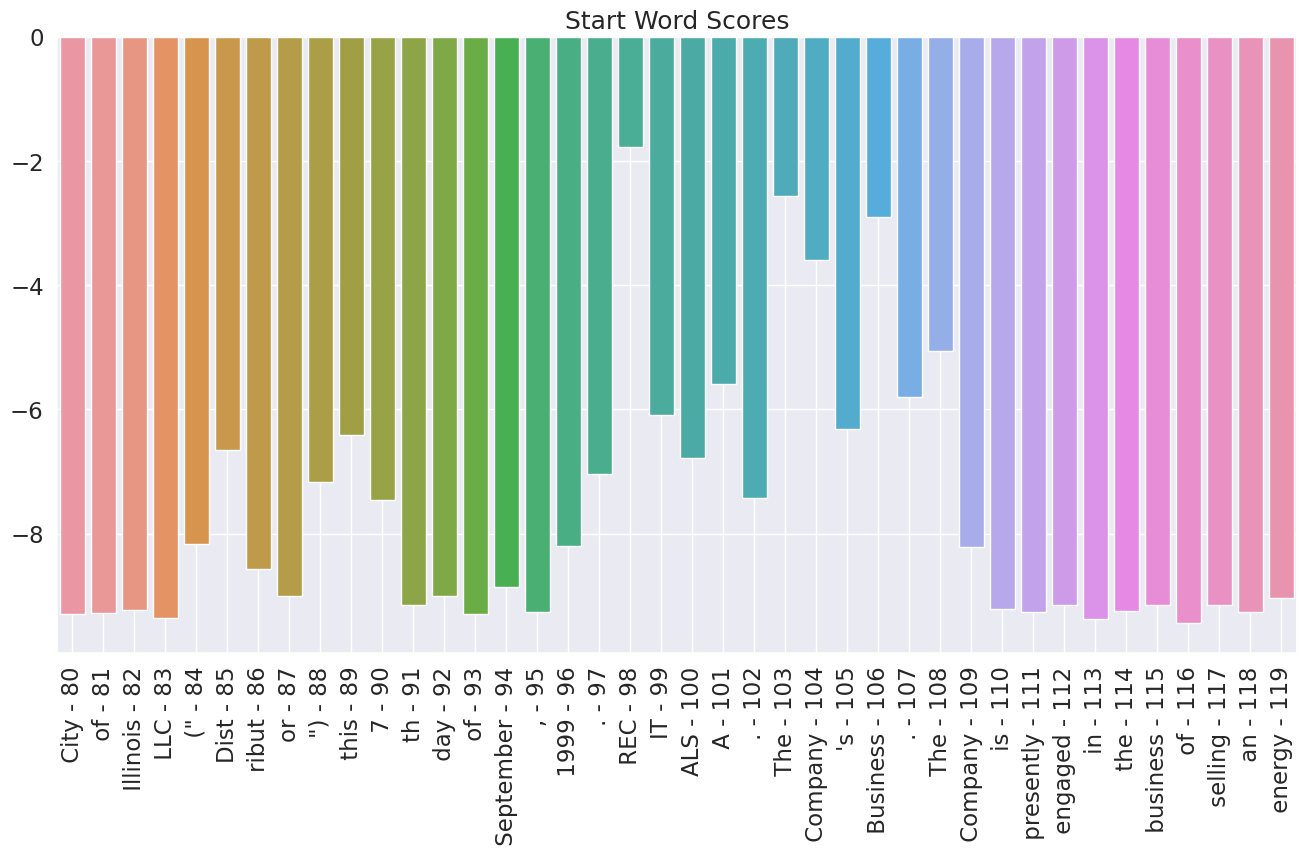

In [11]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(tokenizer.convert_tokens_to_string(token), i))
ax = sns.barplot(x=token_labels[80:120], y=s_scores[80:120], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title('Start Word Scores')

plt.show()

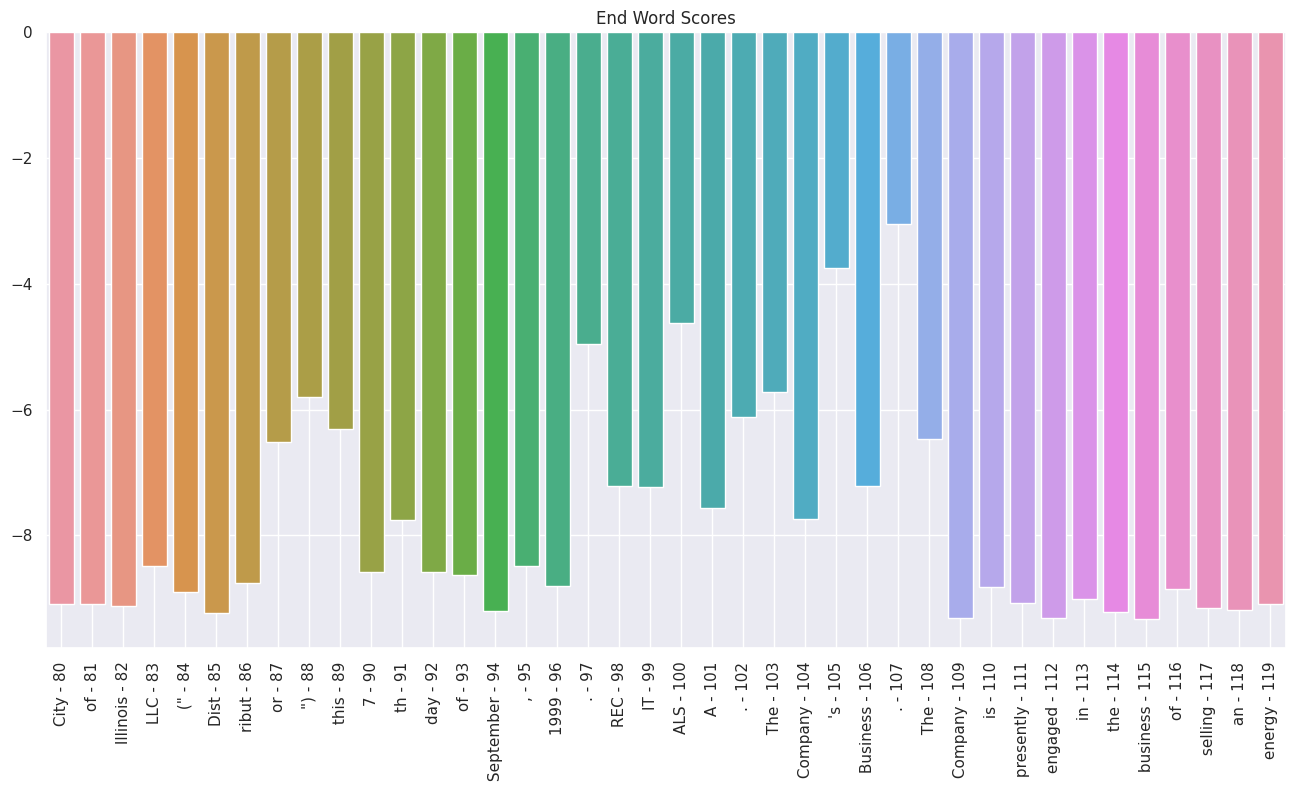

In [40]:
ax = sns.barplot(x=token_labels[80:120], y=e_scores[80:120], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title('End Word Scores')
plt.show()

In [41]:
start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores)
answer = tokenizer.convert_tokens_to_string(tokens[start_index:end_index+1])
answer.strip()


'DISTRIBUTOR AGREEMENT'

In [8]:
import sys  
sys.path.insert(0, '/home/kv806/nsr/cuad-training/')
import train

In [9]:
train.train()

TypeError: train() missing 4 required positional arguments: 'args', 'train_dataset', 'model', and 'tokenizer'

In [10]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="roberta-base",
    tokenizer="roberta-base"
)
fill_mask("Send these <mask> back!")

[{'sequence': 'Send these pictures back!',
  'score': 0.16661517322063446,
  'token': 3493,
  'token_str': ' pictures'},
 {'sequence': 'Send these photos back!',
  'score': 0.10792823135852814,
  'token': 2356,
  'token_str': ' photos'},
 {'sequence': 'Send these emails back!',
  'score': 0.0767093375325203,
  'token': 5575,
  'token_str': ' emails'},
 {'sequence': 'Send these images back!',
  'score': 0.04860769584774971,
  'token': 3156,
  'token_str': ' images'},
 {'sequence': 'Send these letters back!',
  'score': 0.048417266458272934,
  'token': 5430,
  'token_str': ' letters'}]

In [11]:
from transformers import RobertaTokenizer, RobertaForMaskedLM

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForMaskedLM.from_pretrained('roberta-base')

In [ ]:
############################################################ Mar 21 ###########################

In [6]:
import argparse
import glob
import logging
import os
import random
import timeit
import json

import numpy as np
import torch
from torch.utils.data import DataLoader, RandomSampler, DistributedSampler, SequentialSampler
from tqdm import tqdm, trange


In [7]:
import transformers
from transformers import (
    MODEL_FOR_QUESTION_ANSWERING_MAPPING,
    WEIGHTS_NAME,
    AdamW,
    AutoConfig,
    AutoModelForQuestionAnswering,
    AutoTokenizer,
    get_linear_schedule_with_warmup,
    squad_convert_examples_to_features,
)

In [8]:
from utils import (
    compute_predictions_logits,
    squad_evaluate,
)

In [ ]:
#A "typical" attention mechanism might assign the weight 𝑤𝑖 to one of the source vectors as 𝑤𝑖∝exp(𝑢𝑇𝑖𝑣) where 𝑢𝑖 is the 𝑖th "source" vector and 𝑣 is the query vector. The attention mechanism described in OP from "Pointer Networks" opts for something slightly more involved: 𝑤𝑖∝exp(𝑞𝑇tanh(𝑊1𝑢𝑖+𝑊2𝑣)), but the main ideas are the same -- you can read my answer here for a more comprehensive exploration of different attention mechanisms. 

In [16]:
#Config parameters 
output_dir = "./train_models/roberta-base"
model_type = "roberta"
model_name_or_path = "roberta-base"
train_file =  "./data/train_separate_questions.json"
predict_file = "./data/test.json"
# do_train  
# do_eval
# version_2_with_negative
learning_rate = 1e-4 
num_train_epochs = 4
per_gpu_eval_batch_size = 40
per_gpu_train_batch_size =40

max_seq_length = 512   # BERT has an input size limit of 512 tokens, so transformers are limited in how much they can take in. 
max_query_length = 20 # Queries are labels in CUAD
max_answer_length = 512
doc_stride = 256

save_steps = 1000
n_best_size = 20
# overwrite_output_dir
local_rank = -1 # disable dist computing 


In [21]:
if doc_stride >= max_seq_length - max_query_length:
    print("WARNING - doc_stride")

if (
    os.path.exists(output_dir)
    and os.listdir(output_dir)
    and do_train
):
    raise ValueError(
        "Output directory ({}) already exists and is not empty. Use --overwrite_output_dir to overcome.".format(
            output_dir
        )
    )

# Setup CUDA, GPU & distributed training
if local_rank == -1 or no_cuda:
    device = torch.device("cuda" if torch.cuda.is_available()  else "cpu")
    n_gpu = torch.cuda.device_count()


# Set the verbosity to info of the Transformers logger (on main process only):
#if is_main_process(args.local_rank):
transformers.utils.logging.set_verbosity_info()
transformers.utils.logging.enable_default_handler()
transformers.utils.logging.enable_explicit_format()

# Set seed
#set_seed(args)



In [32]:
# Load pretrained model and tokenizer

model_type = model_type.lower()

config = AutoConfig.from_pretrained(model_name_or_path)

tokenizer = AutoTokenizer.from_pretrained(
    model_name_or_path,
    do_lower_case = True,
    cache_dir =  None,
    use_fast=False,  # SquadDataset is not compatible with Fast tokenizers which have a smarter overflow handeling
)


model = AutoModelForQuestionAnswering.from_pretrained(
    model_name_or_path,
    from_tf=bool(".ckpt" in model_name_or_path),
    config=config,
    cache_dir =  None,
)


model.to(device)

#logger.info("Training/evaluation parameters %s", args)

# Training

train_dataset = load_and_cache_examples(args, tokenizer, evaluate=False, output_examples=False)
global_step, tr_loss = train(args, train_dataset, model, tokenizer)
logger.info(" global_step = %s, average loss = %s", global_step, tr_loss)

# Save the trained model and the tokenizer

print("Saving model checkpoint to %s", output_dir)
    # Save a trained model, configuration and tokenizer using `save_pretrained()`.
    # They can then be reloaded using `from_pretrained()`
    # Take care of distributed/parallel training
model_to_save = model.module if hasattr(model, "module") else model
model_to_save.save_pretrained(args.output_dir)
tokenizer.save_pretrained(args.output_dir)

    # Good practice: save your training arguments together with the trained model
torch.save(args, os.path.join(args.output_dir, "training_args.bin"))

    # Load a trained model and vocabulary that you have fine-tuned
model = AutoModelForQuestionAnswering.from_pretrained(output_dir)  # , force_download=True)
    #print("LOADED MODEL")

    # SquadDataset is not compatible with Fast tokenizers which have a smarter overflow handeling
    # So we use use_fast=False here for now until Fast-tokenizer-compatible-examples are out
tokenizer = AutoTokenizer.from_pretrained(args.output_dir, do_lower_case=args.do_lower_case, use_fast=False)
model.to(device)


[INFO|configuration_utils.py:545] 2022-03-04 15:59:30,520 >> loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /home/kv806/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
[INFO|configuration_utils.py:581] 2022-03-04 15:59:30,521 >> Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.9.2",
  "type_vocab_size": 1,
  "use_

NameError: name 'load_and_cache_examples' is not defined

In [ ]:

# Evaluation - we can ask to evaluate all the checkpoints (sub-directories) in a directory
results = {}
if args.do_eval and args.local_rank in [-1, 0]:
    if args.do_train:
        logger.info("Loading checkpoints saved during training for evaluation")
        checkpoints = [args.output_dir]
        if args.eval_all_checkpoints:
            checkpoints = list(
                os.path.dirname(c)
                for c in sorted(glob.glob(args.output_dir + "/**/" + WEIGHTS_NAME, recursive=True))
            )

    else:
        logger.info("Loading checkpoint %s for evaluation", args.model_name_or_path)
        checkpoints = [args.model_name_or_path]

    logger.info("Evaluate the following checkpoints: %s", checkpoints)

    for checkpoint in checkpoints:
        # Reload the model
        global_step = checkpoint.split("-")[-1] if len(checkpoints) > 1 else ""
        model = AutoModelForQuestionAnswering.from_pretrained(checkpoint)  # , force_download=True)
        model.to(args.device)

        # Evaluate
        result = evaluate(args, model, tokenizer, prefix=global_step)

        result = dict((k + ("_{}".format(global_step) if global_step else ""), v) for k, v in result.items())
        results.update(result)
